# Algoritmo de Bernstein-Vazirani

Vamos considerar uma função
$$f:\{0,1\}^{n}\rightarrow \{0,1\}.$$
Ou seja, $f$ tem como input sequências de $n$ bits
$$x=x_{n-1}\cdots x_{1}x_{0}$$
com
$$x_{j}=0\ \text{ou}\ x_{j}=1$$
 para $j=0,\cdots,n-1$ e tem como output 0 ou 1.

Vamos considerar um __oráculo__ que contém uma __sequência secreta__ de bits
$$s=s_{n-1}\cdots s_{1}s_{0}$$
e que, em cada consulta (query), nos retorna
\begin{align}
f_{s}(x) & = s\cdot x \\
& \equiv s\cdot x\bmod 2 \\
& = \sum_{j=0}^{n-1}s_{j}x_{j}\bmod 2.
\end{align}
O problema a ser resolvido é encontrar $s$:
$$s=?$$
Esse é o chamado __problema de Bernstein-Vazirani__.

Como cada consulta ao oráculo nos fornece um único escalar como resposta, __classicamente__ o melhor que podemos fazer é fazer as seguintes $n$ perguntas:
\begin{align}
& f(100\cdots 00) = s_{n-1}, \\
& f(010\cdots 00) = s_{n-2}, \\
& f(001\cdots 00) = s_{n-3}, \\
& \vdots \\
& f(000\cdots 10) = s_{1}, \\
& f(000\cdots 01) = s_{0}.
\end{align}
Com isso, obtemos o valor de $s=s_{n-1}\cdots s_{1}s_{0}$. Como exemplo, consideremos
$$n=3\ \text{e}\ s=101.$$
Teremos que
\begin{align}
& f(100) = 1s_{2}+0s_{1}+0s_{0} = s_{2} = 1,\\
& f(010) = 0s_{2}+1s_{1}+0s_{0} = s_{1} = 0, \\
& f(001) = 0s_{2}+0s_{1}+1s_{0} = s_{0} =1.
\end{align}
Com isso, concluiremos que
$$s=(f(100))(f(010))(f(001)) = 101.$$

__Quanticamente__, no algoritmo de Bernstein-Vazirani (ABV), assim como no algoritmo de Deutsch-Jozsa (ADJ), começamos com $n+1$ qubits preparados no estado
\begin{align}
|\Psi_0\rangle & = |+\rangle^{\otimes n}\otimes|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes|-\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\otimes\big(|0\rangle-|1\rangle\big).
\end{align}

O oráculo funciona de forma similar a no caso do ADJ:
$$U_{f}|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle.$$
No caso do ABV temos a seguinte ação específica do oráculo
$$U_{s}|x\rangle|y\rangle = |x\rangle|y\oplus s\cdot x\rangle.$$
Com isso, teremos que
\begin{align}
|\Psi_1\rangle & = U_{s}|\Psi_0\rangle \\
& = U_{s}|+\rangle^{n}|-\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(U_{s}|x\rangle|0\rangle - U_{s}|x\rangle|1\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(|x\rangle|0\oplus s\cdot x\rangle - |x\rangle|1\oplus s\cdot x\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\big(|s\cdot x\rangle - |\overline{s\cdot x}\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}|x\rangle(-1)^{s\cdot x}\big(|0\rangle - |1\rangle\big) \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle |-\rangle \\
& = |\psi_s\rangle|-\rangle.
\end{align}
Aqui aparece novamente o chamado __phase kickback__ (retorno da fase), pois a fase dependente de $x$ acaba sendo adicionada a este estado. Usar o estado $|-\rangle$ para o qubit auxiliar é importante para este método.


O algoritmo de Bernstein-Vazirani está ilustrado na figura abaixo.

![](https://drive.google.com/uc?export=view&id=1wGhYKpq2mydjob3MMS03ZrPiwj-0Z_bA)

Seguindo, vamos verificar que os estados
$$|\psi_{s}\rangle := \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle$$
formam um conjunto ortonormal. Começamos olhando para
\begin{align}
\langle\psi_{s}|\psi_{t}\rangle & = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{s\cdot x}\langle x|\sum_{y=0}^{2^{n}}(-1)^{t\cdot y}|y\rangle \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}}(-1)^{s\cdot x + t\cdot y}\langle x|y\rangle \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}}(-1)^{s\cdot x + t\cdot y}\delta_{y,x} \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{s\cdot x + t\cdot x} \\
& = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{(s+t)\cdot x},
\end{align}
em que usamos
\begin{align}
s\cdot x + t\cdot x & = \sum_{j=0}^{n-1}s_{j}x_{j}\bmod2 + \sum_{j=0}^{n-1}t_{j}x_{j}\bmod2 \\
& = \Big(\sum_{j=0}^{n-1}s_{j}x_{j} + \sum_{j=0}^{n-1}t_{j}x_{j}\Big)\bmod2 \\
& = \sum_{j=0}^{n-1}(s_{j}+t_{j})x_{j}\bmod2 \\
& = (s+t)\cdot x.
\end{align}

Agora, para um dado $k=s+t$ teremos
\begin{align}
\sum_{x=0}^{2^{n}}(-1)^{k\cdot x} & \equiv \sum_{x_{1}=0}^{1}\sum_{x_{2}=0}^{1}\cdots\sum_{x_{n}=0}^{1} (-1)^{k_{1}x_{1}+k_{2}x_{2}+\cdots+k_{n}x_{n}} \\
 & = \sum_{x_{1}=0}^{1}(-1)^{k_{1}x_{1}}\sum_{x_{2}=0}^{1}(-1)^{k_{2}x_{2}}\cdots\sum_{x_{n}=0}^{1} (-1)^{k_{n}x_{n}} \\
& = 2\delta_{k_{1},0}2\delta_{k_{2},0}\cdots 2\delta_{k_{n},0} \\
& = 2^{n}\delta_{k,0},
\end{align}
em que usamos
\begin{align}
\sum_{x_{j}=0}^{1}(-1)^{k_{j}x_{j}} & = (-1)^{k_{j}0}+(-1)^{k_{j}1} \\
& = 1+(-1)^{k_{j}} \\
& = 2\delta_{k_{j},0}.
\end{align}
Por conseguinte
\begin{align}
\langle\psi_{s}|\psi_{t}\rangle & = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}}(-1)^{(s+t)\cdot x} \\
& = \frac{1}{2^{n}}2^{n}\delta_{s+t,0} \\
& = \delta_{s,t},
\end{align}
pois a soma é feita bit a bit, e assim
$$s+t=0\ \therefore\ s=t.$$

Podemos verificar também que essa base é completa:
\begin{align}
\sum_{s=0}^{2^{n}-1}|\psi_{s}\rangle\langle\psi_{s}| & = \sum_{s=0}^{2^{n}-1}\frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{s\cdot y}\langle y| \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}\Big(\sum_{s=0}^{2^{n}-1}(-1)^{s\cdot(x+y)}\Big)|x\rangle\langle y| \\
& = \frac{1}{2^{n}}\sum_{x,y=0}^{2^{n}-1}2^{n}\delta_{x,y}|x\rangle\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle x| \\
& = \mathbb{I}_{2^{n}}.
\end{align}
A importância de $\{|\psi_{s}\rangle\}$ formar uma base ortonormal é que, a princípio, podemos medir nessa base, descobrindo assim o valor de $s$.

Agora, tendo o estado
$$|\Psi_1\rangle = U_{s}|+\rangle^{\otimes n}|-\rangle = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}(-1)^{s\cdot x}|x\rangle |-\rangle = |\psi_{s}\rangle|-\rangle,$$
vejamos como podemos obter $s$.

Consideremos a chamada __transformada de Hadamard__. Lembremos da porta de Hadamard, reescrita como segue
\begin{align}
H & = \frac{1}{2^{1/2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix} \\
& = \frac{1}{2^{1/2}}\sum_{x_j,y_j=0}^{1}(-1)^{x_j y_j}|x_j\rangle\langle y_j|,
\end{align}
para escrever
\begin{align}
& H^{\otimes n} = H\otimes H\otimes\cdots\otimes H \\
& = \frac{1}{2^{1/2}}\sum_{x_{1},y_{1}=0}^{1}(-1)^{x_{1}y_{1}}|x_{1}\rangle\langle y_{1}|\otimes \frac{1}{2^{1/2}}\sum_{x_{2},y_{2}=0}^{1}(-1)^{x_{2}y_{2}}|x_{2}\rangle\langle y_{2}|\otimes\cdots\otimes \frac{1}{2^{1/2}}\sum_{x_{n},y_{n}=0}^{1}(-1)^{x_{n}y_{n}}|x_{n}\rangle\langle y_{n}| \\
& = \frac{1}{2^{n/2}}\sum_{x_{1},x_{2},\cdots,x_{n},y_{1},y_{2},\cdots,y_{n}=0}^{1}(-1)^{x_{1}y_{1}+x_{2}y_{2}+\cdots+x_{n}y_{n}}|x_{1}x_{2}\cdots x_{n}\rangle\langle y_{1}y_{2}\cdots y_{n}| \\
& = \frac{1}{2^{n/2}}\sum_{x,y=0}^{2^{n}-1}(-1)^{x\cdot y}|x\rangle\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\frac{1}{2^{n/2}}\sum_{y=0}^{2^{n}-1}(-1)^{x\cdot y}\langle y| \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle\psi_{x}|.
\end{align}

Com isso, vem que
\begin{align}
H^{\otimes n}|\Psi_1\rangle & = H^{\otimes n}U_{s}|+\rangle^{\otimes n}|-\rangle & \\
& = H^{\otimes n}|\psi_{s}\rangle|-\rangle \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\langle\psi_{x}|\psi_{s}\rangle|-\rangle \\
& = \sum_{x=0}^{2^{n}-1}|x\rangle\delta_{x,s}|-\rangle \\
& = |s\rangle\otimes|-\rangle.
\end{align}
Portanto, medindo os $n$ primeiros qubits na base computacional, descobriremos o valor de $s$. O circuito quântico completo para o algoritmo de Bernstein-Vazirani está mostrado na sequência, e é bem parecido com aquele referente ao algoritmo de Deutsch-Jozsa. Na verdade o que muda do ADJ para o ABV é que o oráculo é mais específico e que o problema a ser resolvido é outro.

## Exemplo

### Instalações do Qiskit

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.6 MB/s eta 0:00:00


### Circuito quântico

In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit

In [ ]:
def qc_bernstein_vazirani(s):
    ls = len(s)
    qc = QuantumCircuit(ls+1,ls)
    qc.x(ls)
    qc.h(list(range(ls+1)))
    qc.barrier();
    for ii, yesno in enumerate(reversed(s)): # the black box
        if yesno == '1':
            qc.cx(ii, ls);
    qc.barrier();
    qc.h(list(range(ls)));
    qc.barrier();
    qc.measure(list(range(ls)),list(range(ls)))
    return qc

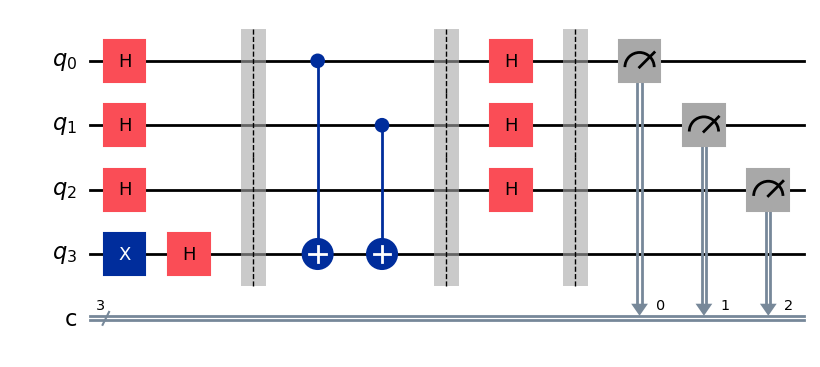

In [ ]:
s = '011' # secret number
qc = qc_bernstein_vazirani(s)
qc.draw(output='mpl')

## Simulação

In [ ]:
from qiskit_aer import AerSimulator
backend = AerSimulator()
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)

In [ ]:
qc_list = []
s = '011' # secret number
qcbva = qc_bernstein_vazirani(s)
qc_list.append(qcbva)

In [ ]:
nshots = 2**12
job = sampler.run(qc_list, shots=nshots)

In [ ]:
counts_sim = job.result()[0].data.c.get_counts()
counts_sim

{'011': 4096}

## Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token="83ab2a86232e48767228534cdae2cf55b8e8ea4e0eb1e57804268f40d7bee64692f719528e8871de617ffc35040d21bd389f4696313f46900c077c7f617a1512")
backend = service.backend(name="ibm_brisbane")

In [ ]:
from qiskit import transpile
qc_transpiled_list = transpile(qc_list, backend=backend, optimization_level=1)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
job = sampler.run(qc_transpiled_list)
print(job.job_id())

csgb1jefk1tg008ztbe0


In [ ]:
job_id = "csgb1jefk1tg008ztbe0"
job = service.job(job_id)

In [ ]:
counts_exp = job.result()[0].data.c.get_counts()
print(counts_exp)

{'111': 69, '011': 3821, '001': 115, '000': 23, '010': 61, '101': 3, '110': 4}


## Gráfico

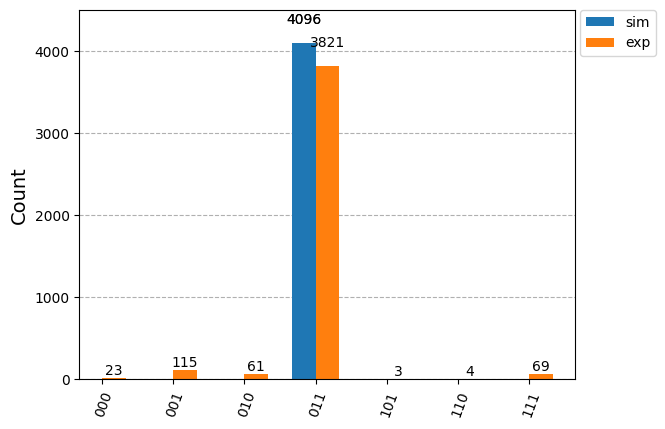

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp],legend = ['sim','exp'])

Assim como fizemos para outros algoritmos, aqui, como no experimento não obtemos somente o estado $|s\rangle$, temos que usar um critério para definir qual estado usaremos como solução. Novamente a escolha mais plausível é o estado que tem maior probabilidade.

Nesse caso, tanto a simulação como o experimento nos indicam que a solução para o problema de Bernstein-Vazirani é
$$s = 110.$$

## Complexidade computacional
dddddddd

## Referências

$1.$ E. Bernstein and U. Vazirani, “Quantum Complexity Theory,” SIAM J. Comput., vol. 26, no. 5, pp. 1411-1473, Oct. 1997, doi: 10.1137/S0097539796300921.

$2.$ M. A. Nielsen and I. L. Chuang, Quantum Computation and Quantum Information (Cambridge University Press, Cambridge, England, 2000).

$3.$ Dave Bacon, Lecture Notes on Quantum Computing (2006), https://courses.cs.washington.edu/courses/cse599d/06wi/.

$4.$ A. Javadi-Abhari et al., “Quantum computing with Qiskit.” arXiv, May 14, 2024. doi: 10.48550/arXiv.2405.08810.
